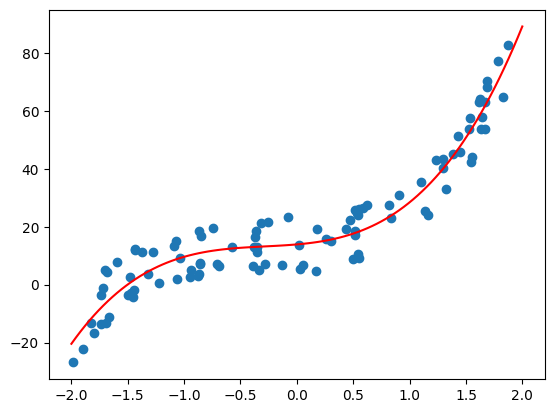

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 3

def polynomial_features(x, degree):
    features = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        features = np.concatenate((features, np.power(x, i).reshape(-1, 1)), axis=1)
    return features

X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2*X + 5 * X**2 + 6*X**3  + 20*np.random.rand(100, 1)

# poly_feats = PolynomialFeatures(degree = 2, include_bias = False)
# X_poly = poly_feats.fit_transform(X)
X_poly = polynomial_features(X, degree);


reg=LinearRegression()
reg.fit(X_poly, y)

X_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_poly = polynomial_features(X_vals, degree)
y_vals = reg.predict(X_vals_poly)

plt.scatter(X, y)
plt.plot(X_vals, y_vals, color="r")
plt.show()

In [ ]:

x = [1, 2 , 3]
t = np.ones((len(x), 1))
print(t)
for i in range(1, 3 + 1):
        t = np.concatenate((t, np.power(x, i).reshape(-1, 1)), axis=1)
        print(t)

[[1.]
 [1.]
 [1.]]
[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


Best lambda: 0.01, Test MSE: 0.33


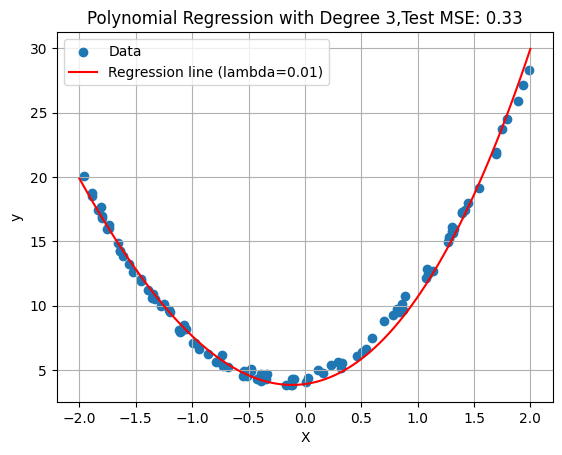

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def polynomial_features(x, degree):
    features = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        features = np.concatenate((features, np.power(x, i).reshape(-1, 1)), axis=1)
    return features

X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2*X + 5 * X**2 + np.random.rand(100, 1)

# poly_feats = PolynomialFeatures(degree = 2, include_bias = False)
# X_poly = poly_feats.fit_transform(X)
# X_poly = polynomial_features(X, degree);

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

degree = 3
lambda_values = [ 0.01, 0.1, 1.0, 10.0]
learning_rate = 0.001
num_iterations = 2000
best_lambda = None
best_mse = float('inf')
best_a = None

for lmd in lambda_values:
    # Initialize parameters
    a = np.zeros((degree + 1, 1))

    # Create polynomial features
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    for _ in range(num_iterations):

        y_pred_train = np.dot(X_train_poly, a)
        gradient = (-2/len(X_train)) * (X_train_poly.T.dot(y_train - y_pred_train)) + 2 * lmd * a
        a -= learning_rate * gradient

     # Compute MSE on test data
    y_pred_test = np.dot(X_test_poly, a)
    mse = np.mean((y_test - y_pred_test) ** 2)

    # Check if this alpha gives better MSE
    if mse < best_mse:
        best_mse = mse
        best_lambda = lmd
        best_a = a

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse:.2f}")

plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')

X_range = np.linspace(-2, 2, 100).reshape(-1, 1)
X_range_poly = polynomial_features(X_range, degree)

if best_a is not None:  # Check if best_a is valid
    y_range = np.dot(X_range_poly, best_a)
    # Plot the regression line
    plt.plot(X_range, y_range, color='red', label=f'Regression line (lambda={best_lambda})')
else:
    print("Error: best_a is None")

plt.title(f"Polynomial Regression with Degree {degree},Test MSE: {best_mse:.2f}")
plt.legend()
plt.grid(True)
plt.show()